|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix
import seaborn as sns


# Q2: Read instagram_users.csv file

In [3]:
# write your code here ^_^
DF = pd.read_csv('instagram_users.csv')

# Q3: Split tha dataset into training and testing

In [4]:
# write your code here ^_^
X = DF.drop('real_fake', axis=1)  # Features 
y = DF['real_fake']  # Target 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [5]:
# write your code here ^_^
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
preidect = model1.predict(X_test)

accuracy = accuracy_score(y_test, preidect)
cm = confusion_matrix(y_test, preidect)
print("Model 1 - Decision Tree")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)


Model 1 - Decision Tree
Accuracy: 0.8564090590707448
Confusion Matrix:
[[5479  856]
 [ 989 5525]]


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


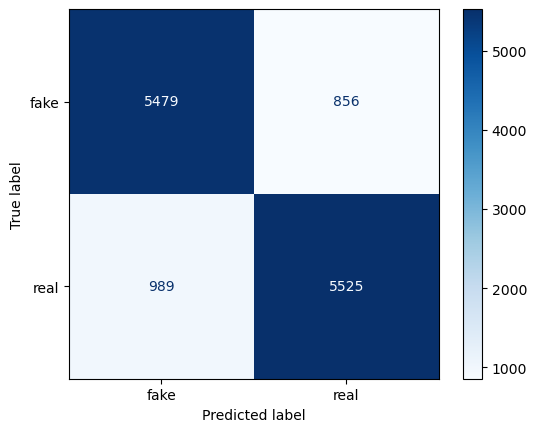

In [6]:
plot_confusion_matrix(model1, X_test, y_test, cmap="Blues")

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [7]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

preidect = model2.predict(X_test)
accuracy = accuracy_score(y_test, preidect)
cm = confusion_matrix(y_test, preidect)

print("Model 2 - Random Forest")
print("Accuracy:", accuracy)
print("Confusion Matrix:",cm)


Model 2 - Random Forest
Accuracy: 0.9040392248424002
Confusion Matrix:
[[5393  942]
 [ 291 6223]]


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


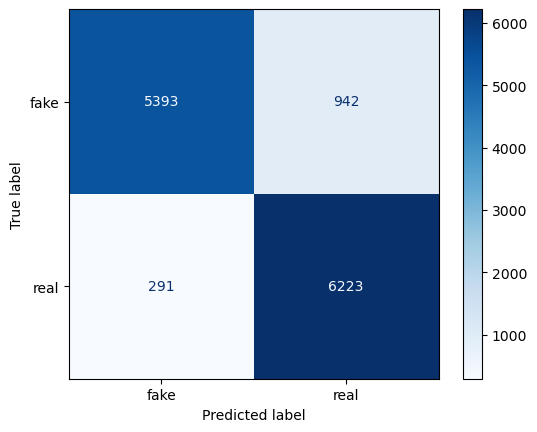

In [8]:
plot_confusion_matrix(model2, X_test, y_test, cmap="Blues")

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [9]:
# write your code here ^_^
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)

preidect = model3.predict(X_test)
accuracy = accuracy_score(y_test, preidect)
cm = confusion_matrix(y_test, preidect)
print("Model 3 - Support Vector Machine")
print("Accuracy:", accuracy)
print("Confusion Matrix:",cm)


Model 3 - Support Vector Machine
Accuracy: 0.704646275974784
Confusion Matrix: [[3456 2879]
 [ 916 5598]]


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


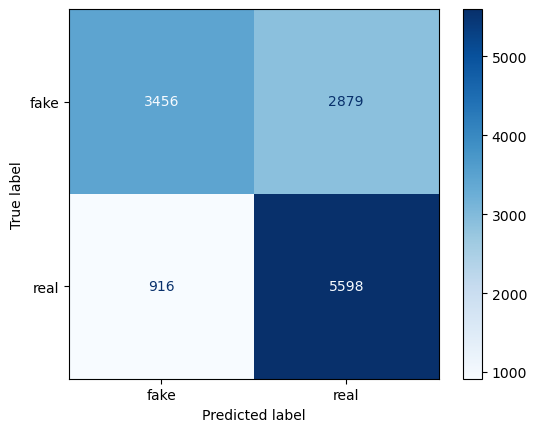

In [10]:
plot_confusion_matrix(model3, X_test, y_test, cmap="Blues")